#Name :- Sai Narendra Panga
#Reg.No :- 21BCE9868

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing   import StandardScaler, LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import  MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df = df.drop("User ID",axis = 1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.shape

(400, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum()

20

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

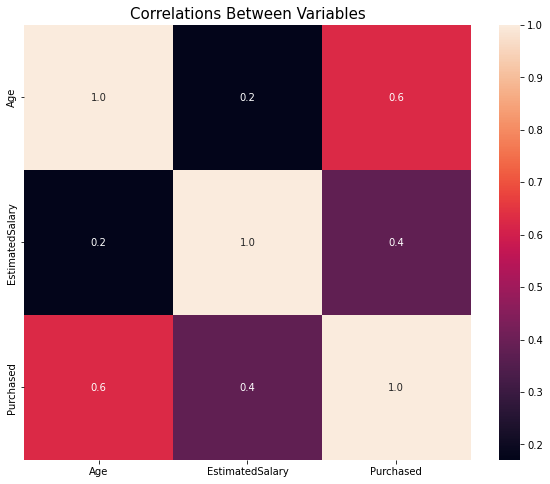

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, fmt= '.1f')
plt.title("Correlations Between Variables", size=15)
plt.show()

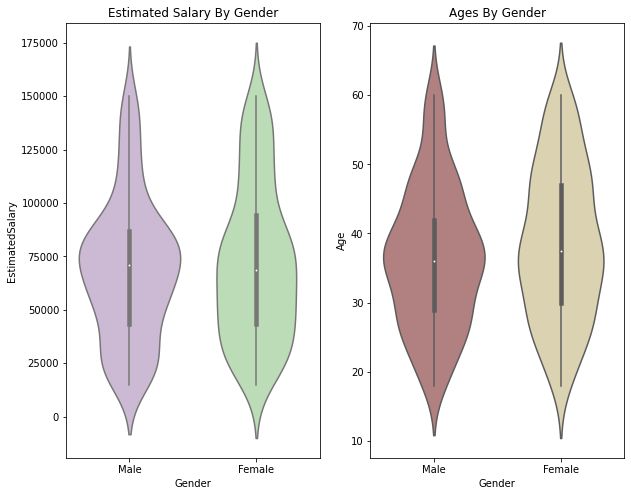

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,8))
sns.violinplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.violinplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

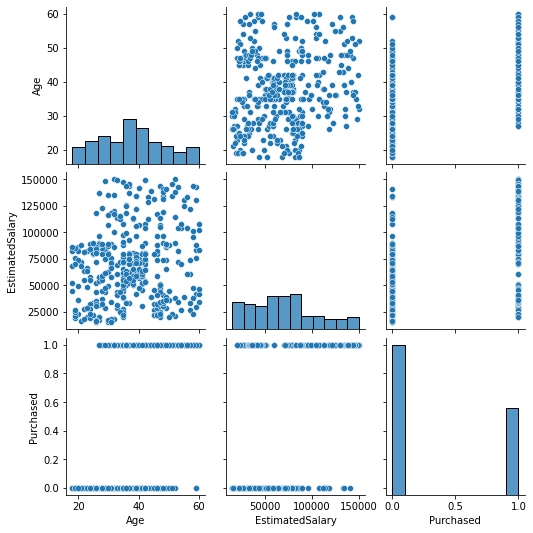

In [ ]:
sns.pairplot(df)

In [ ]:
label = LabelEncoder()

In [ ]:
df["Gender"] = label.fit_transform(df["Gender"])

In [ ]:
y = df["EstimatedSalary"]
X = df.drop("EstimatedSalary", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
X.head()

,Gender,Age,Purchased
0,1,19,0
1,1,35,0
2,0,26,0
3,0,27,0
4,1,19,0


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_model= KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

34083.723542569634

In [ ]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model  = KNeighborsRegressor(n_neighbors= k).fit(X_train,y_train)
    y_pred  = knn_model.predict(X_test)
    rmse=  np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=", k, "RMSE value for",rmse)

k= 1 RMSE value for 43880.33968107261
k= 2 RMSE value for 38381.46482490296
k= 3 RMSE value for 34767.952575838994
k= 4 RMSE value for 34003.94713930475
k= 5 RMSE value for 34083.723542569634
k= 6 RMSE value for 34058.15889231981
k= 7 RMSE value for 33364.822577182604
k= 8 RMSE value for 33965.76498166166
k= 9 RMSE value for 33498.86578821463
k= 10 RMSE value for 33551.04202633104


In [25]:
#GridSearchCV
knn_params= {"n_neighbors":np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,  knn_params, cv =10).fit(X_train,y_train)
knn_cv_model.best_params_


{'n_neighbors': 17}

In [26]:
#Final Model
knn_tuned  = KNeighborsRegressor(n_neighbors=17).fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


32763.543620408054

In [27]:
svr_model = SVR(kernel="linear").fit(X_train,y_train)
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

37422.983462005635

In [28]:
svr_model = SVR(kernel="linear").fit(X_train,y_train)
svr_params=  {"C": np.arange(1,30,1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv= 10,verbose= 0,  n_jobs= -1).fit(X_train,y_train)
svr_cv_model.best_params_

{'C': 29}

In [29]:
svr_tuned = SVR(kernel="linear", C = 29).fit(X_train,y_train)
y_pred  = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

36820.64788081194

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
mlp_model = MLPRegressor().fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

80075.78538287958

In [32]:
mlp_params= {"alpha": [0.1,0.01,0.02,0.001,0.0001],
            "hidden_layer_sizes": [(10,20),(5,5),(100,100)]}

In [33]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv =10,  verbose=0,n_jobs= -1  ).fit(X_train,y_train)

In [34]:
mlp_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [35]:
#Final
mlp_tuned  = MLPRegressor(alpha=0.02, hidden_layer_sizes = (100,100)).fit(X_train,y_train)
y_pred =mlp_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

76890.81609397412

In [36]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [37]:
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

32720.02856621048

In [39]:
cart_params  = {"max_depth": [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10]}

In [40]:
cart_model = DecisionTreeRegressor()

In [41]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train,y_train)
cart_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [42]:
#final model
cart_tuned = DecisionTreeRegressor(max_depth= 2 , min_samples_split=2).fit(X_train,y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

32309.46070816092

In [43]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

35846.03894971523

In [45]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200,500,1000,2000],
            "min_samples_split": [2,10,80,100]}


In [49]:
rf_model = RandomForestRegressor(max_depth=5,max_features=2,min_samples_split=10,n_estimators= 200 )
rf_tuned = rf_model.fit(X_train,y_train)
y_pred  = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

33113.9536903599

In [50]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

33495.14181759881

In [51]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor()